<a href="https://colab.research.google.com/github/HugoKD/NLP/blob/main/Projet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparaison d'algorithmes pour classification de texte

### Membres:

- Henri Ngo
- Hugo Cadet

## Description:

Dans ce projet, nous avons vu les les fondamentaux du traitement automatique du langage naturel. Nous avons appliqué concrètement les concepts enseignés en classe pour aborder une tâche de classification simple. Notre approche s'inspire de la manière dont nous résoudrions ce type de problème dans le monde réel. Nous nous sommes familiarisés avec des bibliothèques couramment utilisées en NLP ainsi qu'en science des données.

Nous avons travaillé sur unsemble de données comprenant des évaluations de produits provenant d'Amazon. Chaque évaluation est accompagnée de trois informations : le titre fourni par l'utilisateur, le commentaire détaillé et le nombre d'étoiles attribué par l'utilisateur au produit.

Notre objectif principal était de prédire le nombre d'étoiles attribué à une évaluation en se basant sur le commentaire et le titre associés.

Notre travail s'est articulé autour de 3 grandes parties :

- **Chargement, prétraitement et visualisation des données :** Dans cette première étape, nous avons pris en charge le chargement et le prétraitement des données afin de les préparer à être utilisées par les algorithmes dans les étapes suivantes.
- **Classification :** Cette phase a été dédiée à l'exploration des différents algorithmes pouvant être appliqués à notre tâche. Nous avons également réalisé une analyse approfondie des sorties du classificateur bayésien naïf.
- **Amélioration du modèle :** Enfin, nous avons cherché à améliorer notre modèle de deux façons distinctes. Tout d'abord, en effectuant une recherche d'hyper-paramètres avec validation croisée à l'aide d'un GridSearch. Ensuite, en utilisant l'extraction d'attributs avec l'aide de ChatGPT pour entraîner un nouveau modèle et comparer ainsi une représentation de type "Bag of words" avec une représentation contenant des attributs spécifiques.

## Plan du TP

1. [Chargement, prétraitement et visualisation des données](#1)
   - 1.1 [Charger les données](#1.1)
     - 1.1.1 [Charger le jeu de données](#1.1.1)
     - 1.1.2 [Fusionner les colonnes title et text en une seule colonne](#1.1.2)
   - 1.2 [Prétraitement des données](#1.2)
   - 1.3 [Visualisation des données](#1.3)
     - 1.3.1 [Afficher dans un graphique le nombre d'exemples présents dans le jeu de données pour chaque catégorie](#1.3.1)
     - 1.3.2 [Afficher dans un graphique la quantité moyenne de jetons par exemple selon la catégorie](#1.3.2)
     - 1.3.3 [Afficher en texte les top 10 jetons les plus fréquents par catégorie](#1.3.3)
     - 1.3.4 [Afficher en texte les top 10 adjectifs les plus fréquents selon la catégorie](#1.3.4)
   - 1.4 [Diviser les données en ensembles d'entraînement et de test](#1.4)
   - 1.5 [Construction du vocabulaire](#1.5)
   - 1.6 [Vectorisation des données](#1.6)
   
2. [Classification](#2)
   - 2.1 [Modèle aléatoire (Random baseline)](#2.1)
   - 2.2 [Analyse et compréhension d'un classificateur bayésien naïf (NB)](#2.2)
     - 2.2.1 [Construction du modèle](#2.2.1)
     - 2.2.2 [Matrice de confusion](#2.2.2)
     - 2.2.3 [Visualisation des probabilités de NB](#2.2.3)
     - 2.2.4 [Visualisation des erreurs commises](#2.2.4)
     - 2.2.5 [Analyse d'erreurs commises](#2.2.5)
   - 2.3 [Régression logistique](#2.3)
   - 2.4 [MLP](#2.4)
   
3. [Amélioration de modèle](#3)
   - 3.1 [Recherche d'hyper-paramètres et validation croisée](#3.1)
   - 3.2 [Extraction d'attributs (Feature extraction) avec ChatGPT](#3.2)
   - 3.3 [Amélioration du modèle en 3.2](#3.3)


<a name='1'></a>
## 1. Chargement, prétraitement et visualisation des données

Download et prétraitement des données afin qu'elles soient prêtes à être utilisées par les algorithmes lors de la deuxième partie.

<a name='1.1'></a>
### 1.1 Charger les données

Résolution avec la bibliothèque **pandas**.

<a name='1.1.1'></a>
#### 1.1.1 Charger le jeu de données

Chargment du jeu de données amazon_rating.csv.


In [ ]:
import pandas as pds

In [ ]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /content


In [ ]:
data = pds.read_csv("amazon_rating.csv")
data

,title,text,rating
0,Five Stars,good as any name brand,5
1,Did The Job,Ordered on accident when I had searched for RE...,3
2,Great product,I was looking for something to read on and thi...,5
3,Leaking Acid EVERYEWHERE!!,After 2nd recharge and use all but 3 are leaki...,1
4,One Star,They fail earlier than brand names. I assumed ...,1
...,...,...,...
2788,Three Stars,Weird but some didn't last long as they should,3
2789,Good for kids but SLOW,"A good starter tablet, but very very slow. Don...",3
2790,good tablet to star,is a God tablet but the camera could be a litt...,3
2791,Just decent tablet,Not many apps. The first one was already retur...,3


<a name='1.1.2'></a>
#### 1.1.2 Fusionner les colonnes title et text en une seule colonne


```
# Ce texte est au format code
```



In [ ]:
data['text'] = data['title'] + ' ' + data['text']
print(data)

                           title  \
0                     Five Stars   
1                    Did The Job   
2                  Great product   
3     Leaking Acid EVERYEWHERE!!   
4                       One Star   
...                          ...   
2788                 Three Stars   
2789      Good for kids but SLOW   
2790         good tablet to star   
2791          Just decent tablet   
2792                    One Star   

                                                   text  rating  
0                     Five Stars good as any name brand       5  
1     Did The Job Ordered on accident when I had sea...       3  
2     Great product I was looking for something to r...       5  
3     Leaking Acid EVERYEWHERE!! After 2nd recharge ...       1  
4     One Star They fail earlier than brand names. I...       1  
...                                                 ...     ...  
2788  Three Stars Weird but some didn't last long as...       3  
2789  Good for kids but SLOW A good sta

In [ ]:
data.columns

Index(['title', 'text', 'rating'], dtype='object')

In [ ]:
data = data.drop(columns=['title'], axis=1)

In [ ]:
data

,text,rating
0,good as any name brand,5
1,Ordered on accident when I had searched for RE...,3
2,I was looking for something to read on and thi...,5
3,After 2nd recharge and use all but 3 are leaki...,1
4,They fail earlier than brand names. I assumed ...,1
...,...,...
2788,Weird but some didn't last long as they should,3
2789,"A good starter tablet, but very very slow. Don...",3
2790,is a God tablet but the camera could be a litt...,3
2791,Not many apps. The first one was already retur...,3


<a name='1.2'></a>
### 1.2 Prétraitement des données

En utilisant la librairie nltk, implémentation de la fonction suivante qui :

- Enlève les majuscules.
- Enlève les caractères de ponctuation.
- Segmente la séquence en entrée en une liste de jetons (tokenization).
- Enlève les "stopwords"
- Effectue la racinisation.
- Retourne l'ensemble des jetons de la séquence
    

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

nltk.download('punkt')
nltk.download('wordnet')

nltk.download("stopwords")
stopwords = stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()
#lemmer = nltk.stem.wordnet.WordNetLemmatizer()


def preprocess(sentence):
    """
    Fonction qui transforme une chaine de caractère en liste de jetons.
    Les pre-traitements à implémenter sont:
    1. Enlever les majuscules
    2. Enlever les caractères de ponctuations
    3. Séparer la chaine de caractères en une liste de jetons (tokenization)
    4. Enlever les stopwords
    5. Stemming (racinisation)

    :param sentence: une chaine de caractère
    :return: la liste de jetons
    """
    sentence = sentence.lower()
    sentence = re.sub('[^\w]',' ', sentence)
    sentence = word_tokenize(sentence)
    sentence = [token for token in sentence
                if token not in stopwords]
    print(sentence)
    sentence = [stemmer.stem(token) for token in sentence]

    tokens = sentence

    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
"""
NE PAS MODIFIER

Le code suivant appliquera votre fonction sur tous les exemples. Il gardera aussi une version originale pour une analyse future.
"""

data["text_original"] = data["text"]
data["text"] = data["text"].apply(preprocess)


['five', 'stars', 'good', 'name', 'brand']
['job', 'ordered', 'accident', 'searched', 'rechargeable', 'batteries', 'happy', 'less', 'free', 'ordering', 'amazon', 'fault', 'made', 'put', 'guard']
['great', 'product', 'looking', 'something', 'read', 'fit', 'bill', 'right', 'price', 'great', 'screen', 'clarity', 'good', 'adjustment', 'works', 'well', 'battery', 'life', 'great', 'size', 'nice', 'big', 'enough', '1', 'hand', 'needed']
['leaking', 'acid', 'everyewhere', '2nd', 'recharge', 'use', '3', 'leaking', 'corrosive', 'fluid', 'ruined', 'charger']
['one', 'star', 'fail', 'earlier', 'brand', 'names', 'assumed', 'amazon', 'would', 'match', 'beat', 'others', 'order']
['okay', 'got', 'smaller', 'lighter', 'original', 'kindle', 'fire', 'easy', 'operate', 'original', 'kindle', 'fire']
['gift', 'purchased', 'nephew', 'loved', 'stop', 'playing']
['battery', 'pack', 'missing', 'item', 'arrived', 'battery', 'pack', 'way', 'power', 'toy', 'without', 'use', 'regular', 'batteries']
['hard', 'set', 

<a name='1.3'></a>
### 1.3 Visualisation des données


La colonne "rating" contient le nombre d'étoiles associé à l'évaluation d'un utilisateur. Le nombre d'étoiles varie entre 1 et 5.

Afin de simplifier la tâche de classification, nous avons enlevé les commentaires ayant 2 et 4 étoiles du jeu de données. Cela signifie qu'il y a trois catégories de commentaires, c'est-à-dire ceux ayant 1, 3 ou 5 étoiles.

Dans un graphique on aura donc :

- Le nombre d'exemples présents dans le jeu de données par catégorie.
- La quantité moyenne de jetons par exemple selon la catégorie.


<a name='1.3.1'></a>
#### 1.3.1  Afficher dans un graphique le nombre d'exemples présents dans le jeu de données pour chaque catégorie

<Axes: xlabel='Rating'>

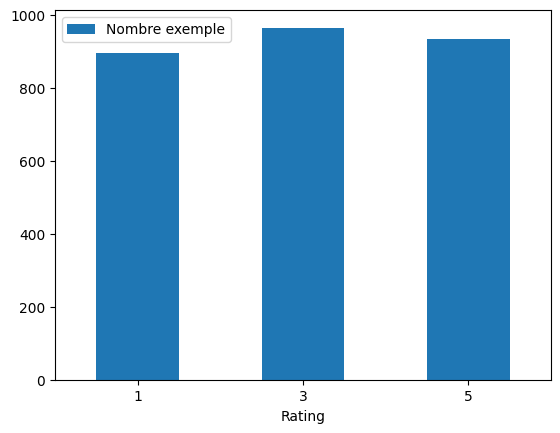

In [ ]:
import matplotlib.pyplot as plt
Rating = [1,3,5]
Nexemple = [len(data[data['rating'] == 1]),
            len(data[data['rating'] == 3]),
            len(data[data['rating'] == 5])]

df = pds.DataFrame({'Rating': Rating, 'Nombre exemple' : Nexemple})
df.plot.bar(x='Rating', y='Nombre exemple', rot = 0)


<a name='1.3.2'></a>
#### 1.3.2 Afficher dans un graphique le nombre moyen de jetons dans les exemples de chaque catégorie (4 points)

<Axes: title={'center': 'Nombre de token moyen'}, xlabel='rating'>

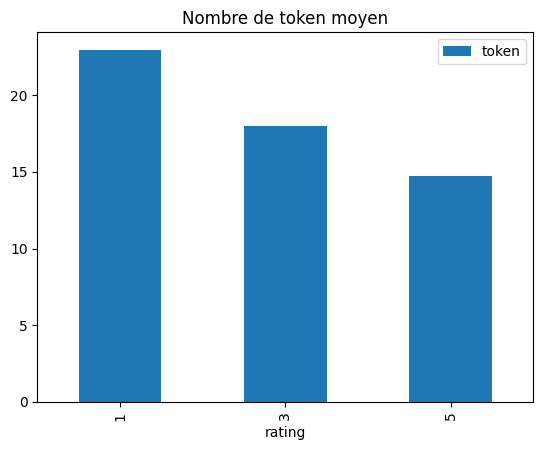

In [ ]:

data['token'] = [len(comment) for comment in data['text']]
grouped = data.groupby('rating')
grouped.mean('rating').plot.bar(title = "Nombre de token moyen")


<a name='1.3.3'></a>
#### 1.3.3 Afficher en texte les top 10 des jetons les plus fréquents par catégorie

In [ ]:
from collections import Counter

for i in [1,3,5]:
  cnt = Counter()
  for comment in data[data['rating'] == i]['text']:
    for word in comment:
      cnt[word] +=1
  print(cnt.most_common(10))


[('batteri', 1224), ('last', 406), ('one', 346), ('use', 330), ('amazon', 324), ('work', 269), ('buy', 236), ('star', 181), ('purchas', 163), ('week', 160)]
[('batteri', 459), ('tablet', 380), ('good', 363), ('use', 247), ('last', 242), ('price', 231), ('great', 230), ('three', 193), ('long', 189), ('star', 186)]
[('great', 618), ('tablet', 393), ('batteri', 382), ('love', 307), ('good', 261), ('price', 248), ('use', 212), ('star', 182), ('five', 181), ('work', 168)]


<a name='1.3.4'></a>
#### 1.3.4 Affichage en texte les top 10 des adjectifs les plus fréquents selon la catégorie

Pour cet exercice, on utilisera la fonction [nltk.pos_tag](https://www.nltk.org/book/ch05.html) et retenir les jetons identifiés comme JJ.

Pour obtenir de bons résultats, le tagger [nltk.pos_tag](https://www.nltk.org/book/ch05.html) doit être exécuté sur le texte original, incluant les stopwords.

**Les adjectifs sont les jetons identifiés comme JJ.**

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

data['text_tokenized'] = data['text_original'].apply((word_tokenize))
data['text_tokenized'] = data['text_tokenized'].apply((pos_tag))

for i in [1,3,5]:
  cnt = Counter()
  for comment in data[data['rating'] == i]['text_tokenized']:
    for word in comment:
      if  word[1] == 'JJ' :
        cnt[word[0]] +=1
  print(cnt.most_common(10))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('last', 259), ('good', 102), ('dead', 95), ('other', 83), ('few', 72), ('same', 66), ('bad', 65), ('new', 62), ('first', 53), ('long', 48)]
[('good', 238), ('last', 201), ('great', 132), ('Good', 102), ('other', 82), ('old', 63), ('little', 62), ('slow', 56), ('ok', 49), ('long', 46)]
[('great', 260), ('good', 175), ('old', 90), ('easy', 82), ('Good', 71), ('other', 64), ('last', 58), ('Great', 48), ('long', 36), ('Excellent', 35)]


<a name='1.4'></a>
### 1.4 Diviser les données en ensembles d'entraînement et de test

À l'aide de la fonction [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de SKlearn, on sépare les données en ensembles d'entraînement (67% des données) et de test (33% des données). Gardez les deux ensembles dans 2 variables.

In [ ]:
from sklearn.model_selection import train_test_split
X = data['text']
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)


<a name='1.5'></a>
### 1.5 Construction du vocabulaire

Dans un modèle Bag-of-Words (BoW), un vocabulaire est prédéterminé à partir de l'ensemble d'entraînement. Seuls les mots faisant partie de ce vocabulaire seront considérés pour la suite.


In [ ]:
from collections import Counter
import numpy as np

def build_voc(documents, threshold):
  L = []
  cnt = Counter()
  for line in documents:
    for word in line :
      cnt[word] += 1
  for word in cnt :
    if cnt[word] >= threshold :
      L.append(word)
  return np.array(L)

voc = build_voc(X_train,0)
#voc.shape


In [ ]:
voc

array(['decent', 'batteri', 'ok', ..., 'yellow', 'static', 'cordless'],
      dtype='<U29')

<a name='1.6'></a>
### 1.6 Vectorisation des données

À l'aide de la classe [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) de Sklearn, transformation l'ensemble de jetons en matrice de co-occurence utilisant TF-IDF.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(vocabulary=voc)
X_train_list = [' '.join(token) for token in X_train ]
X_train_tfidf = vectorizer.fit_transform(X_train_list)



In [ ]:
X_train_tfidf

<1871x2802 sparse matrix of type '<class 'numpy.float64'>'
	with 28196 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_list

['decent batteri decent batteri ok life',
 'terribl dont buy bought around black friday 60 hope would awesom fail hard tri multipl differ micro sd card none recogn ye format everi format could think fat32 ntf fat xfat even tri tablet didnt work make matter wors half app want use werent app store came find isnt link normal googl play store tablet app store miss mani common app main reason bought play clash clan cant wasnt app store tri also use aftermarket play store play coc didnt work launch play 1 time didnt work updat needless say return bought 250 samsung galaxi tab 10 1 2016 version pen wayyyyy better bottom line get pay also hint pen version extra 1 gb ram non pen version get afford extra 50',
 'good luck amazon basic peripher devic comput good luck amazon basic peripher devic comput 24 pack aaa batteri got virtual power packag perhap qualiti control issu got burn one bought take anoth chanc',
 'easi use grandson love product easi use',
 'suitabl toy drain within coupl suitabl to

<a name='2'></a>
## 2. Classification

Maintenant que les données sont prêtes à être utilisées par nos modèles, nous allons entrainer et tester différent types de modèles sur le jeu de données afin d'en faire la comparaison.

Cette section sera divisé en cinq modèle:
   - Modèle aléatoire (Random baseline)
   - Classificateur bayésien naïf
   - Régression Logistique
   - Multi-Layer Perceptron (MLP)

<a name='2.1'></a>
### 2.1 Modèle aléatoire (Random baseline)

Un seuil (baseline) est un modèle servant de référence et dont les performances représentent un seuil à dépasser.

#### a) Générez ce seuil en effectuant des prédictions aléatoires parmi les valeurs 1, 3 et 5. Ensuite, affichez les mesures de performance : précision, rappel (recall) et F1. Utilisez la classe classification_report de SKlearn et affichez 4 chiffres après la virgule.

In [ ]:
np.random.seed(7)

y_true = np.random.choice([1, 3, 5], size = 100)
y_pred = np.random.choice([1, 3, 5], size = 100)

In [ ]:
from sklearn.metrics import classification_report

target_names = ['rating 1','rating 3', 'rating 5']
cr = classification_report(y_true, y_pred, target_names=target_names, digits=4)

print(cr)

              precision    recall  f1-score   support

    rating 1     0.3548    0.2683    0.3056        41
    rating 3     0.3333    0.4194    0.3714        31
    rating 5     0.3667    0.3929    0.3793        28

    accuracy                         0.3500       100
   macro avg     0.3516    0.3602    0.3521       100
weighted avg     0.3515    0.3500    0.3466       100



Le F1-Score est proche de 0.33 ce qui représente une distribution uniforme.

<a name='2.2'></a>
### 2.2 Analyse et compréhension d'un classificateur bayésien naïf (NB)

Naive Bayes (NB) est un algorithme très simple pouvant servir de bon point de départ (baseline) pour les tâches de classification. Ce numéro portera sur l'analyse de ce modèle afin de bien comprendre son comportement.

<a name='2.2.1'></a>
#### 2.2.1 Construction du modèle

Construction du modèle à l'aide de la classe MultinomialNB de SKlearn. Utilisez les données vectorisées produites en 1.6.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

X_test_tfidf = [' '.join(token) for token in X_test ]
X_test_tfidf = vectorizer.transform(X_test_tfidf)

y_pred = classifier.predict(X_test_tfidf)
print("Valeurs prédites")
print(y_pred)

Valeurs prédites
[5 3 3 5 5 3 1 3 3 3 5 5 3 5 5 5 5 1 3 5 5 3 3 5 1 5 1 3 1 1 5 3 3 5 1 5 5
 5 1 5 5 1 3 3 3 3 1 5 5 1 3 5 1 5 1 1 3 5 5 3 1 1 5 5 3 1 5 5 1 3 3 1 3 3
 1 1 1 5 3 5 3 1 1 3 5 1 1 3 3 5 3 1 3 3 5 3 5 1 5 1 3 5 1 1 5 5 1 1 1 1 5
 3 5 1 1 3 5 5 5 3 5 1 1 5 1 3 1 1 1 1 3 3 1 5 5 1 3 1 3 5 1 5 5 3 5 1 5 5
 1 5 3 5 3 1 1 3 5 5 3 5 5 5 1 3 3 5 1 5 5 3 5 5 1 1 5 5 3 1 3 5 3 3 5 1 5
 3 1 5 5 1 3 5 3 3 5 3 5 5 1 3 3 1 3 5 1 1 3 3 5 3 5 3 1 1 1 1 5 3 3 5 1 5
 3 5 1 5 3 1 5 3 1 3 3 3 5 3 3 5 3 5 1 1 3 5 1 3 3 3 1 5 5 3 1 1 3 1 3 3 5
 5 5 3 5 5 1 3 3 5 1 5 1 1 1 1 3 3 1 3 5 5 1 5 3 5 5 1 5 5 1 1 3 1 5 5 3 1
 5 5 1 1 5 5 1 3 3 3 3 5 5 5 5 1 5 3 1 3 1 3 3 3 3 5 1 1 3 1 1 5 3 5 3 5 1
 3 5 1 5 1 3 3 1 1 1 5 5 3 3 5 5 5 5 1 5 5 1 1 5 3 5 3 3 3 5 3 1 3 3 1 5 5
 1 1 5 1 3 5 1 5 5 5 3 5 1 1 5 5 5 3 3 1 1 1 1 1 3 5 3 1 5 5 5 1 3 5 3 5 3
 3 5 5 1 1 3 1 3 1 3 5 5 1 5 1 5 3 1 5 5 5 1 3 3 1 1 1 5 5 5 1 5 3 5 5 1 5
 1 5 1 1 3 3 5 3 3 5 1 3 5 1 5 1 5 5 1 1 3 5 1 1 5 5 3 3 5 5 1 3 5 5 3 1 5
 5 3 5 1

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_pred)
print("Rapport de métriques généré par sklearn")
print(cr)
print("\n")

Rapport de métriques généré par sklearn
              precision    recall  f1-score   support

           1       0.85      0.86      0.85       305
           3       0.84      0.74      0.78       338
           5       0.78      0.87      0.82       279

    accuracy                           0.82       922
   macro avg       0.82      0.82      0.82       922
weighted avg       0.82      0.82      0.82       922





<a name='2.2.2'></a>
####  2.2.2 Matrice de confusion


Matrice de confusion
[[263  30  12]
 [ 31 249  58]
 [ 17  18 244]]




<Axes: >

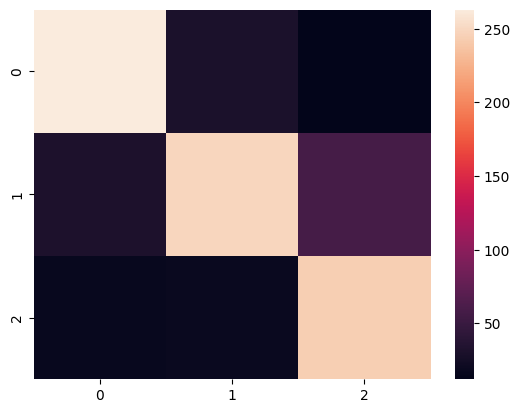

In [ ]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

cm = confusion_matrix(y_test,y_pred)
print("Matrice de confusion")
print(cm)
print("\n")

heatmap(cm)

<a name='2.2.3'></a>
####  2.2.3 Visualisation des probabilités de NB

Naive Bayes est un classificateur suivant une approche générative. Durant son entraînement, il apprend les probabilités P(x_i|y). En utilisant le théorème de Bayes, on peut exprimer la probabilité d'une classe donnée y étant donné un ensemble de caractéristiques x_1, x_2, ..., x_n comme suit :

$$ P(y|x_1, x_2, ..., x_n) = P(y) * P(x_1|y) * P(x_2|y) * ... * P(x_n|y) $$

Ainsi, étant donné un exemple ayant le jeton x_i, plus la probabilité P(x_i|y) est élevée pour une classe, plus la probabilité que l'exemple provienne de cette classe augmente.


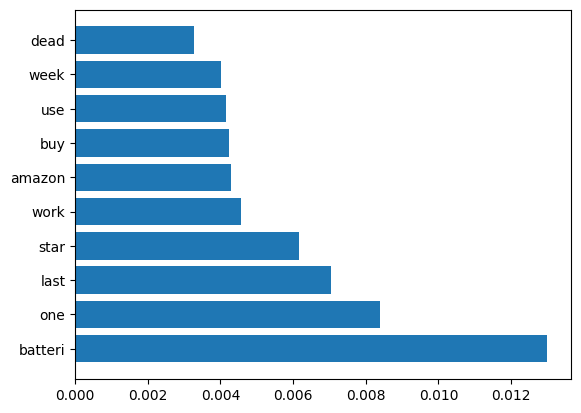

In [ ]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

def visualisation (c):
  I=[]
  X,Y = [],[]
  proba = np.exp(classifier.feature_log_prob_[c])
  for i in range(10):
      maximum_index = proba.argmax()

      X.append(voc[maximum_index])
      Y.append(proba[maximum_index])
      I.append(maximum_index)

      proba[maximum_index] = 0

  plt.barh(X,Y)


visualisation(0)


On remarque que les probabilités des jetons sont très petit inférieur à 0.01 pour la plus part. De plus, il y a des jetons neutres qui ne donne pas d'indication pour la classification comme le jeton 'amazon'

<a name='2.2.4'></a>
#### 2.2.4 Visualisation des erreurs commises



In [ ]:
I = []
for i in range(len(y_pred)):
  if y_pred[i] == 1 and y_test.iloc[i] == 5:
    I.append(i)
for i in I :
  Error_5_1 = X_test.iloc[i]
  print(X_test.iloc[i])


['longest', 'last', 'batteri', 'ever', 'longest', 'last', 'batteri', 'ever', 'use', 'bought', 'xbox', 'one', 'control', 'use', 'hour', 'time', 'everi', 'day', 'replac', 'batteri', 'mayb', 'everi', 'coupl', 'week']
['good', 'cheap', 'option', 'receiv', 'advertis', 'pretti', 'good']
['amazon', 'basic', 'product', 'rule', 'first', 'time', 'bought', 'amazon', 'basic', 'product', 'last', 'experi', 'product', 'well', 'name', 'brand', 'product', 'less', 'experi', 'love', 'packag', 'batteri', 'came', 'far', 'tell', 'work', 'like', 'charm', 'put', 'coupl', 'gadget', 'work', 'perfectli', 'way', 'go', 'batteri', 'cost', 'save', 'well', 'worth']
['batteri', 'day', 'price', 'buy', 'buy', '8pack', 'store', 'pay', 'similar', 'lifespan', 'notic', 'differ', 'retir', '30', 'year', 'probabl', 'buy', 'case', 'get', 'last', 'year', 'last']
['reliabl', 'long', 'last', 'heard', 'one', 'consum', 'guru', 'radio', 'year', 'ago', 'say', 'gener', 'lesser', 'known', 'brand', 'batteri', 'often', 'good', 'name', 'br

<a name='2.2.5'></a>
#### 2.2.5 Analyse d'erreurs commises

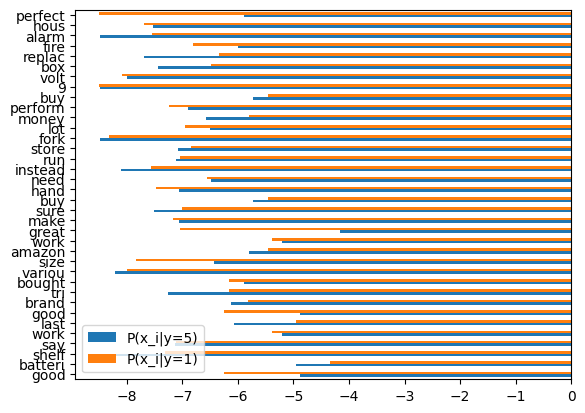

In [ ]:
def plot_example(tokens):
  I = []
  C1 = []
  C5 = []
  X = []
  proba = classifier.feature_log_prob_
  for token in tokens :
    for i in range(len(voc)) :
      if voc[i] == token :
        I.append(i)
        X.append(voc[i])
        C1.append(proba[0][i])
        C5.append(proba[2][i])

  df = pds.DataFrame({'P(x_i|y=5)' : C5,
                      'P(x_i|y=1)' : C1},
                      index = X )
  df.plot.barh()

plot_example(Error_5_1)

Des mots comme 'great' se retrouve dans des erreurs (mauvaise prédiction de classe). Il y a également des mot qui peuvent avoir deux sens si on met un 'not' avant ou après comme 'recommend' ou 'would'

<a name='2.3'></a>
### 2.3 Régression logistique


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train_tfidf,y_train)
y_pred = clf.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_pred)
print("Rapport de métriques généré par sklearn")
print(cr)
print("\n")

Rapport de métriques généré par sklearn
              precision    recall  f1-score   support

           1       0.88      0.90      0.89       305
           3       0.81      0.80      0.81       338
           5       0.83      0.83      0.83       279

    accuracy                           0.84       922
   macro avg       0.84      0.84      0.84       922
weighted avg       0.84      0.84      0.84       922





<a name='2.4'></a>
### 2.4 MLP

Entrainement d'un modèle neuronal de type [Multi-layer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) à l'aide de SKLearn en utilisant les données produites en 1

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier().fit(X_train_tfidf,y_train)
y_pred = clf.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_pred)
print("Rapport de métriques généré par sklearn")
print(cr)
print("\n")

Rapport de métriques généré par sklearn
              precision    recall  f1-score   support

           1       0.86      0.86      0.86       305
           3       0.78      0.80      0.79       338
           5       0.83      0.81      0.82       279

    accuracy                           0.82       922
   macro avg       0.82      0.82      0.82       922
weighted avg       0.82      0.82      0.82       922





<a name='3'></a>
## 3. Amélioration de modèle


<a name='3.1'></a>
###  3.1 Recherche d'hyper-paramètres et validation croisée avec un gridsearch

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Étapes du pipeline
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB

# Déclaration du pipeline
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression()),
])

In [ ]:
# Liste des paramètres à essayer pour les fonctions du pipeline.
parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)],
    'tfidf__max_features': [100, 500, 1000],
    'tfidf__use_idf': (True, False),
    'tfidf__smooth_idf': (True, False),
    'clf__penalty': ('l1', 'l2', 'elasticnet', None),
    'clf__C': [0.1, 1.0, 10.0],
}

In [ ]:
# Apprentissage et prédiction avec le modèle GridSearchCV, dont la déclaration prend comme arguments le pipeline et les paramètres à tester
X = data['text_original']
y = data['rating']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y, test_size = 0.2)

gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1, scoring='f1_weighted')
gs_clf.fit(X_train_1, y_train_1)
y_pred_1 = gs_clf.predict(X_test_1)

print("Meilleurs paramètres trouvés:\n", gs_clf.best_params_, "\n")
print("Meilleur score atteint:\n", gs_clf.best_score_, "\n")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.d

Meilleurs paramètres trouvés:
 {'clf__C': 10.0, 'clf__penalty': 'l2', 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 1), 'tfidf__smooth_idf': True, 'tfidf__use_idf': True} 

Meilleur score atteint:
 0.8283462055947355 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


> Les attributs choisis et leur valeurs optimales sont :

**C**: 10.0, **penalty**: 'l2', **max_features**: 1000, **ngram_range**: (1, 1), **smooth_idf**: True, **use_idf**: True

<a name='3.2'></a>
###  3.2 Extraction d'attributs (Feature extraction) avec ChatGPT




**Bag of Words** (BoW) avec **CountVectorizer** ou **TfidfVectorizer** : Ces techniques de vectorisation de texte vous permettent de créer une représentation numérique des mots dans le commentaire et le titre.

**Longueur du commentaire et du titre** : Vous pouvez calculer la longueur en nombre de mots du commentaire et du titre. Cela peut être utile car la longueur du texte peut parfois être corrélée avec le nombre d'étoiles attribué.

**Sentiment du commentaire** : Vous pouvez utiliser des bibliothèques de traitement du langage naturel (NLP) pour extraire le sentiment du commentaire, par exemple, en déterminant si le commentaire est positif, négatif ou neutre.

**Occurrence de mots-clés spécifiques** : Si vous avez des mots-clés ou des termes spécifiques qui sont importants dans votre domaine, vous pouvez compter combien de fois ils apparaissent dans le commentaire et le titre.

**Fréquence des mots** : Vous pouvez calculer la fréquence des mots les plus courants dans le commentaire et le titre. Cela peut être utile pour identifier les mots-clés ou les thèmes récurrents.

**N-grammes** : Outre les unigrammes (mots individuels), vous pouvez extraire des bigrammes, trigrammes, etc., pour capturer des combinaisons de mots significatives.

**Utilisation de modèle de plongement de mots** (Word Embeddings) : Vous pouvez utiliser des modèles de plongement de mots pré-entraînés comme **Word2Vec**, **FastText** ou **GloVe** pour représenter chaque mot dans le commentaire et le titre par un vecteur de nombres réels. Vous pouvez ensuite agréger ces vecteurs pour obtenir une représentation de l'ensemble du texte.

**Doc2Vec** : C'est une extension de Word2Vec qui permet de représenter des documents entiers (dans ce cas, des commentaires) sous forme de vecteurs. Chaque commentaire est représenté par un vecteur unique qui capture son contenu sémantique.

**Similarité cosinus** : Vous pouvez calculer la similarité cosinus entre le commentaire et le titre pour mesurer à quel point ils sont similaires sur le plan sémantique.

**Nombre de majuscules** : Vous pouvez compter le nombre de lettres majuscules dans le commentaire et le titre, ce qui peut être un indicateur de l'émotion ou de l'importance.

**Nombre de ponctuations et d'exclamations** : Vous pouvez compter le nombre de signes de ponctuation et d'exclamations dans le commentaire, ce qui peut indiquer l'émotion ou l'enthousiasme de l'évaluateur.

**Analyse de la syntaxe** : Vous pouvez utiliser des techniques d'analyse de la syntaxe pour extraire des informations grammaticales, telles que le nombre de phrases, de paragraphes, de virgules, etc.



In [ ]:
# Doc2Vec

from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

# Préparer vos données sous forme de listes de TaggedDocument
tagged_data = [TaggedDocument(words=comment.split(), tags=[str(i)]) for i, comment in enumerate(comments)]

# Créer un modèle Doc2Vec
model = Doc2Vec(vector_size=100, window=2, min_count=1, dm=1, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Transformer un commentaire en vecteur de plongement
comment_vector = model.infer_vector(["exemple", "de", "commentaire"])

In [ ]:
# Entraînement du modèle :

from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

# Préparer les données d'entraînement sous forme de listes de TaggedDocument
tagged_data = [TaggedDocument(words=comment, tags=[str(i)]) for i, comment in enumerate(X_train)]
# Créer un modèle Doc2Vec
model_DV = Doc2Vec(vector_size=100, window=2, min_count=1, dm=1, epochs=100)
model_DV.build_vocab(tagged_data)
# Entraîner le modèle
model_DV.train(tagged_data, total_examples=model_DV.corpus_count, epochs=model_DV.epochs)

In [ ]:
# Foction de transformation
def docs_to_vectors(model, input_docs):
    vectors = [model.infer_vector(doc) for doc in input_docs]
    return vectors

# Appel à la fonction pour tranformer chaque évaluation de la partie test en vecteur de features :
docs_to_vectors(model_DV, X_test)

[array([-1.604266  ,  0.79282016,  0.16391847, -0.8472299 , -0.14351694,
        -0.25358963, -0.5659724 , -0.0613863 , -0.6210906 ,  0.23359749,
        -0.6938844 , -0.13273945,  0.5124117 ,  0.68937   ,  0.5162842 ,
        -1.0212946 , -0.49072418,  0.02567866,  0.3751331 , -0.15994473,
         0.7897363 , -0.6342252 ,  1.2331258 ,  0.3571598 , -0.3634268 ,
         0.19875242, -0.4136    , -0.908205  , -0.26880038,  0.74336874,
        -0.94042975, -0.22981542,  0.07695095, -1.6382625 , -0.39866617,
         0.70661366, -0.16268583, -1.0905315 , -0.57537055, -0.78936845,
        -0.3488441 ,  0.22626747,  0.21351545,  1.0838779 ,  1.6101528 ,
        -0.93837214, -0.90352774,  0.46400917,  1.0971767 ,  1.4354316 ,
         0.8246165 , -0.65100366, -0.4244118 , -0.8517625 ,  0.09660511,
         0.31249353, -0.10876922,  0.83502334, -0.27124432,  0.17970856,
         0.3486487 ,  1.5078737 , -0.06430131,  0.28447363, -0.8993939 ,
        -0.35581884, -1.1794589 , -0.48209867,  0.4

#### d) Utilisation du code corrigé ci-dessus pour entrainer un modèle MLP avec votre nouvelle représentation des évaluations. Affichez sa performance.

In [ ]:
# Transformation des données :
X_train_Doc2Vec = np.array(docs_to_vectors(model_DV, X_train))
X_test_Doc2Vec = np.array(docs_to_vectors(model_DV, X_test))

In [ ]:
from sklearn.neural_network import MLPClassifier

clf_2 = MLPClassifier().fit(X_train_Doc2Vec,y_train)
y_pred_2 = clf_2.predict(X_test_Doc2Vec)

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_pred_2)
print("Rapport de métriques généré par sklearn")
print(cr)
print("\n")

Rapport de métriques généré par sklearn
              precision    recall  f1-score   support

           1       0.78      0.70      0.74       289
           3       0.70      0.63      0.66       303
           5       0.68      0.81      0.74       330

    accuracy                           0.72       922
   macro avg       0.72      0.71      0.71       922
weighted avg       0.72      0.72      0.71       922





<a name='3.3'></a>
### 3.3 Amélioration du modèle en 3.2

#### a) Optimisation

In [ ]:
# Transformation des données pré-traitées en forme de vecteurs d'attributs :
X_train_Doc2Vec_2 = np.array(docs_to_vectors(model_DV, X_train))
X_test_Doc2Vec_2 = np.array(docs_to_vectors(model_DV, X_test))

In [ ]:
# Remettre les valeurs des vecteurs sur une echelle standard :  (On a essayé d'autres echelle comme MinMaxScale ...)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_vectors_train = scaler.fit_transform(X_train_Doc2Vec_2)
scaled_vectors_test = scaler.fit_transform(X_test_Doc2Vec_2)

In [ ]:
# 1er modèle essayé est Support Vector Classification : (Vu qu'il est recommandé par ChatGPT d'être adéquat avec Doc2Vec)
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(scaled_vectors_train, y_train)
y_pred_3 = svm_classifier.predict(scaled_vectors_test)

In [ ]:
# 2ème modèle essayé est Forêts Aléatoires
from sklearn.ensemble import RandomForestClassifier

RdmF = RandomForestClassifier(n_estimators=60, criterion = "gini", max_depth=20).fit(scaled_vectors_train, y_train);
y_pred_4 = RdmF.predict(scaled_vectors_test)

In [ ]:
# 3ème modèle essayé est le Multi-Layer Perceptron Classifier :
from sklearn.neural_network import MLPClassifier

clf_3 = MLPClassifier().fit(scaled_vectors_train,y_train)
y_pred_5 = clf_3.predict(scaled_vectors_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Meilleur performance affichée : est de MLP
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_pred_5, digits=4)
print("Rapport de métriques généré par sklearn")
print(cr)
print("\n")

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred_5))
print ("Accuracy : ", accuracy_score(y_test, y_pred_5)*100)

Rapport de métriques généré par sklearn
              precision    recall  f1-score   support

           1     0.8344    0.8397    0.8371       312
           3     0.7134    0.7270    0.7201       315
           5     0.7596    0.7390    0.7491       295

    accuracy                         0.7690       922
   macro avg     0.7691    0.7686    0.7688       922
weighted avg     0.7691    0.7690    0.7690       922



[[262  35  15]
 [ 32 229  54]
 [ 20  57 218]]
Accuracy :  76.89804772234274


#### b) Conclusions concernant l'utilisation de ChatGPT et les représentations possibles des documents

> D'après la dernière question, la meilleure performance obtenue ètait à l'aide du modèle MLP appliqué sur des données pré-traitées et échelonnées avec une précision de 76,9% > 72% (en 3.2). Or, on n'a pas pu dépasser notre meilleure score en 2.x) qui est de 84%.

Enfin, on constate que dorénavant ChatGPT est un outil primordial en terme de rapidité d'accès à une information en liaison directe avec ta problématique. Alors, il nous permettera de réduire le temps de recherche. Cependant, il faut toujours remettre en question la qualité de l'information donnée par ChatGPT. Elle necessite dans la majorité des cas des adaptations et parfois elle peut être rejetée s'elle s'avère inutile !